## Logistic Regression

In [52]:
# -----------------------------
# Part 0: Import Required Libraries
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### =============================================================
#### Part 1: Logistic Regression (Binary Classification)
#### Dataset: Admission_Data.csv
#### =============================================================

In this part, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

Ref: Machine Learning by Andrew Ng: www.coursera.org/

In [53]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Lecture Note/Year 4/Semester 2/INTRO MAC LANG IE/Python Code/02_Logistic Regression/Data/Admission_Data.csv")
display(df.head())

print()
# Dataset information
df.info()

print()
# Summary statistics
df.describe()

,Exam 1 Score,Exam 2 Score,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Exam 1 Score  100 non-null    float64
 1   Exam 2 Score  100 non-null    float64
 2   Result        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB



,Exam 1 Score,Exam 2 Score,Result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [55]:
# -----------------------------
# Step 2: Visualization (Data only)
# -----------------------------

admitted = df[df["Result"] == 1]
not_admitted = df[df["Result"] == 0]

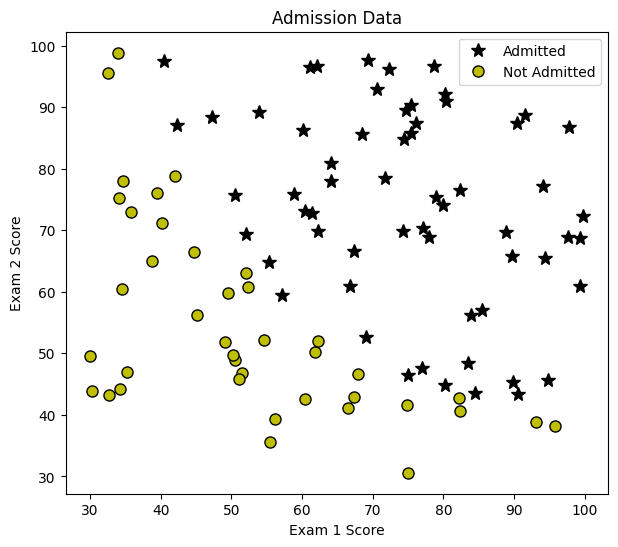

In [56]:
plt.figure(figsize = (7, 6))

# Admitted students
plt.plot(
    admitted["Exam 1 Score"],
    admitted["Exam 2 Score"],
    'k*',
    lw = 2,
    ms = 10,
    label = "Admitted"
)

# Not admitted students
plt.plot(
    not_admitted["Exam 1 Score"],
    not_admitted["Exam 2 Score"],
    'ko',
    mfc = 'y',
    ms = 8,
    mec = 'k',
    mew = 1,
    label = "Not Admitted"
)

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Admission Data")
plt.legend()
plt.grid(False)
plt.show()

In [57]:
# -----------------------------
# Step 3: Prepare Input Features and Target
# -----------------------------

X = df[["Exam 1 Score", "Exam 2 Score"]]
y = df["Result"]

# Note:
# scikit-learn works internally with NumPy arrays.
# However, it also accepts pandas DataFrames and Series as input.
# When a DataFrame is passed, scikit-learn automatically converts it
# to a NumPy array internally.
# Therefore, both pandas and NumPy formats can be used.

In [58]:
# -----------------------------
# Step 4: Train-Test Split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])

Number of training samples: 80
Number of testing samples: 20


In [59]:
# -----------------------------
# Step 5: Train (Unregularized) Logistic Regression Model
# -----------------------------

model = LogisticRegression(penalty = None, solver = "lbfgs")

model.fit(X_train, y_train)

# lbfgs stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno.
# It is a gradient-based method but converges faster than basic gradient descent.
# It is the default and recommended solver for binary logistic regression, multiclass logistic regression, and small to medium datasets.
# Since it is the default solver, we can use just model = LogisticRegression()
# penalty = None to turn of regularization

# LogisticRegression in scikit-learn minimizes the same
# logistic (cross-entropy) loss function as derived in the lecture,
# but the optimization is handled internally.

LogisticRegression(penalty=None)

In [60]:
# -----------------------------
# Step 6: Prediction on Training and Test Sets
# -----------------------------

y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.9125
Test Accuracy: 0.8


In [61]:
# -----------------------------
# Step 7: Predicted Probabilities
# -----------------------------

y_test_prob = model.predict_proba(X_test)

# predict_proba() returns one probability for each class; since this is a binary problem,
# we get two columns: one for not admitted and one for admitted.
# model.predict_proba() returns probabilities in the same order as model.classes_.
# Since the class order is [0 1], then the first column corresponds to class 0 (not admitted)
# and the second column corresponds to class 1 (admitted).

print("Class order:", model.classes_)

y_test_prob_rounded = np.round(y_test_prob, 3)

# First 5 predictions
y_test_prob_rounded[:10]

Class order: [0 1]


array([[0.878, 0.122],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.914, 0.086],
       [0.999, 0.001],
       [0.988, 0.012],
       [0.998, 0.002],
       [0.   , 1.   ],
       [0.035, 0.965],
       [0.976, 0.024]])

In [62]:
# -----------------------------
# Step 8: Calculate cost function J
# -----------------------------

# Predicted probabilities for class 1 (admitted)
y_train_prob = model.predict_proba(X_train)[:, 1]

# In code, model.predict_proba(X)[:, 1] plays the role of the hypothesis ℎ(𝑥) from the lecture.

m = len(y_train)

epsilon = 1e-15  # avoid log(0)
y_train_prob = np.clip(y_train_prob, epsilon, 1 - epsilon)

# We clip probabilities slightly away from 0 and 1 to avoid taking the logarithm of zero, which is undefined for computers.
# In case h(x) = y_train_prob = 0 when y = 1, np.log(y_train_prob) = log(0) = −∞
# or case h(x) = y_train_prob = 1 when y = 0, np.log(1 - y_train_prob) = log(1 - 1) = log(0) = −∞
# This code forces ϵ ≤ h(x) ≤ 1−ϵ

J = -(1 / m) * np.sum(y_train * np.log(y_train_prob) +
    (1 - y_train) * np.log(1 - y_train_prob)
)

print("Training Cost J(theta):", J)

# Predicted probabilities for class 1 (admitted)
y_test_prob = model.predict_proba(X_test)[:, 1]

# Number of test examples
m_test = len(y_test)

# Numerical stability
epsilon = 1e-15
y_test_prob = np.clip(y_test_prob, epsilon, 1 - epsilon)

# Logistic regression cost (same as lecture slides)
J_test = -(1 / m_test) * np.sum(y_test * np.log(y_test_prob) +
        (1 - y_test) * np.log(1 - y_test_prob)
)

print("Test Cost J(theta):", J_test)

Training Cost J(theta): 0.16855337751751
Test Cost J(theta): 0.40337638797161407


In [63]:
# -----------------------------
# Step 9: Model Parameters
# -----------------------------

print("Intercept (theta_0):", model.intercept_)
print("Coefficients (theta_1, theta_2):", model.coef_)

Intercept (theta_0): [-30.48710924]
Coefficients (theta_1, theta_2): [[0.26212686 0.22697343]]


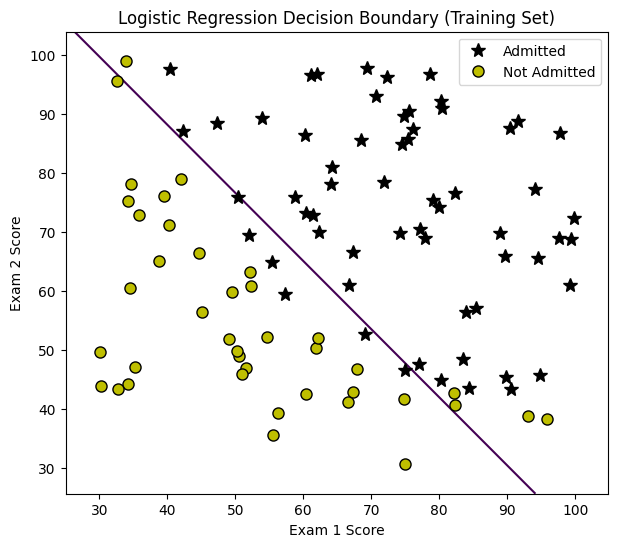

In [64]:
# =============================================================
# Step 10: Decision Boundary Visualization (Training set)
# =============================================================

# -----------------------------
# 1: Create Grid of Feature Values
# -----------------------------

x1_min, x1_max = X["Exam 1 Score"].min() - 5, X["Exam 1 Score"].max() + 5
x2_min, x2_max = X["Exam 2 Score"].min() - 5, X["Exam 2 Score"].max() + 5

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 200),
    np.linspace(x2_min, x2_max, 200)
)

# -----------------------------
# 2: Predict Probability on Grid
# -----------------------------

grid = pd.DataFrame(
    np.c_[xx1.ravel(), xx2.ravel()],
    columns = ["Exam 1 Score", "Exam 2 Score"]
)

prob_grid = model.predict_proba(grid)[:, 1]
prob_grid = prob_grid.reshape(xx1.shape)

# -----------------------------
# 3: Plot Decision Boundary with Data
# -----------------------------

plt.figure(figsize = (7, 6))

# Decision boundary: h_theta(x) = 0.5
plt.contour(xx1, xx2, prob_grid, levels = [0.5])

# Plot training data again
plt.plot(
    admitted["Exam 1 Score"],
    admitted["Exam 2 Score"],
    'k*',
    lw = 2,
    ms = 10,
    label = "Admitted"
)

plt.plot(
    not_admitted["Exam 1 Score"],
    not_admitted["Exam 2 Score"],
    'ko',
    mfc = 'y',
    ms = 8,
    mec = 'k',
    mew = 1,
    label = "Not Admitted"
)

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Logistic Regression Decision Boundary (Training Set)")
plt.legend()
plt.grid(False)
plt.show()

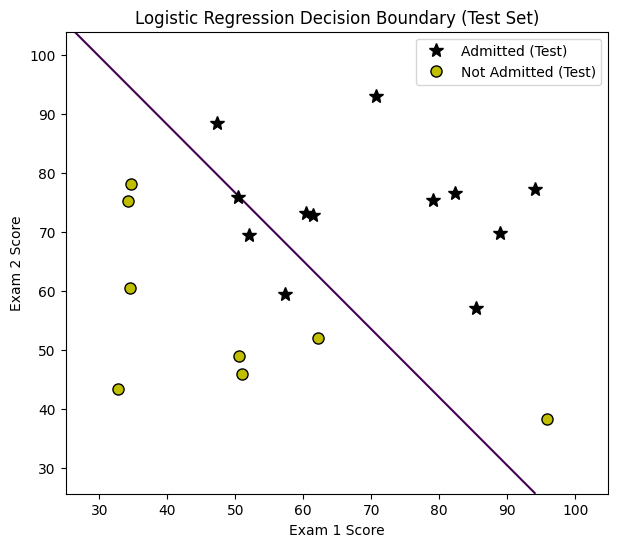

In [65]:
# =============================================================
# Step 11: Decision Boundary Visualization (Test set)
# =============================================================

# -----------------------------
# 1: Separate test data by class
# -----------------------------

X_test_df = X_test.copy()
X_test_df["Result"] = y_test.values

admitted_test = X_test_df[X_test_df["Result"] == 1]
not_admitted_test = X_test_df[X_test_df["Result"] == 0]

# -----------------------------
# 2: Create grid of feature values
# -----------------------------

x1_min, x1_max = X["Exam 1 Score"].min() - 5, X["Exam 1 Score"].max() + 5
x2_min, x2_max = X["Exam 2 Score"].min() - 5, X["Exam 2 Score"].max() + 5

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 200),
    np.linspace(x2_min, x2_max, 200)
)

# -----------------------------
# 3: Predict probabilities on the grid
# -----------------------------

grid = pd.DataFrame(
    np.c_[xx1.ravel(), xx2.ravel()],
    columns=["Exam 1 Score", "Exam 2 Score"]
)

prob_grid = model.predict_proba(grid)[:, 1]
prob_grid = prob_grid.reshape(xx1.shape)

# -----------------------------
# 4: Plot decision boundary with TEST data
# -----------------------------

plt.figure(figsize = (7, 6))

# Decision boundary: h_theta(x) = 0.5
plt.contour(xx1, xx2, prob_grid, levels = [0.5])

# Test set: Admitted
plt.plot(
    admitted_test["Exam 1 Score"],
    admitted_test["Exam 2 Score"],
    'k*',
    lw = 2,
    ms = 10,
    label = "Admitted (Test)"
)

# Test set: Not admitted
plt.plot(
    not_admitted_test["Exam 1 Score"],
    not_admitted_test["Exam 2 Score"],
    'ko',
    mfc = 'y',
    ms = 8,
    mec = 'k',
    mew = 1,
    label = "Not Admitted (Test)"
)

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Logistic Regression Decision Boundary (Test Set)")
plt.legend()
plt.grid(False)
plt.show()

#### =============================================================
#### Part 2: Logistic Regression (Multiclass Classification)
#### Dataset: Generated dataset
#### =============================================================

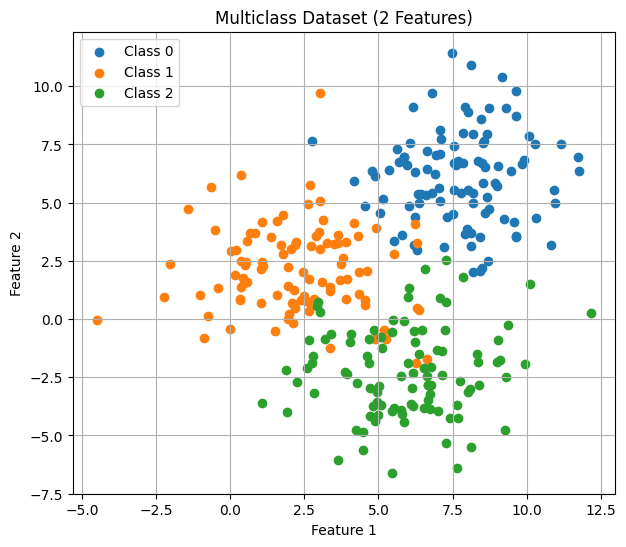

In [66]:
# =============================================================
# Create Multiclass Dataset (2 Features)
# =============================================================

from sklearn.datasets import make_blobs

# -----------------------------
# Step 1: Generate synthetic data
# -----------------------------

X, y = make_blobs(
    n_samples = 300,
    centers = [
        [8, 6],
        [2, 2],
        [6, -2]
    ],
    n_features = 2,
    cluster_std = 2.0,
    random_state = 42
)

# -----------------------------
# Step 2: Create DataFrame
# -----------------------------

df_multi = pd.DataFrame(
    X,
    columns = ["Feature 1", "Feature 2"]
)

df_multi["Class"] = y

df_multi.head()

# -----------------------------
# Step 3: Visualize multiclass data
# -----------------------------

plt.figure(figsize = (7, 6))

for class_label in sorted(df_multi["Class"].unique()):
    class_data = df_multi[df_multi["Class"] == class_label]
    plt.scatter(
        class_data["Feature 1"],
        class_data["Feature 2"],
        label = f"Class {class_label}"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Multiclass Dataset (2 Features)")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# -----------------------------
# Step 1: Prepare data
# -----------------------------

X = df_multi[["Feature 1", "Feature 2"]]
y = df_multi["Class"]

In [68]:
# -----------------------------
# Step 2: Train-test split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [69]:
# -----------------------------
# Step 3: Train (unregularized) multiclass logistic regression (One vs. Rest or One vs. All)
# -----------------------------

model_ovr = OneVsRestClassifier(
    LogisticRegression(penalty = None, max_iter = 1000)
)

model_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000, penalty=None))

In [70]:
# -----------------------------
# Step 3.1: Evaluate model (OvR)
# -----------------------------

y_pred_ovr = model_ovr.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

print("OvR Test Accuracy:", acc_ovr)

OvR Test Accuracy: 0.9


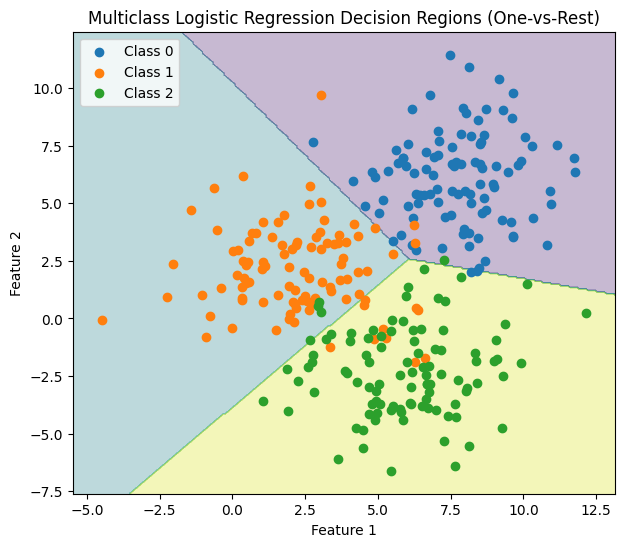

In [71]:
# =============================================================
# Step 3.2 Decision Boundary Visualization (Training set) (OvR)
# =============================================================

# -----------------------------
# 1: Create grid
# -----------------------------

x1_min, x1_max = X["Feature 1"].min() - 1, X["Feature 1"].max() + 1
x2_min, x2_max = X["Feature 2"].min() - 1, X["Feature 2"].max() + 1

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 300),
    np.linspace(x2_min, x2_max, 300)
)

grid = np.c_[xx1.ravel(), xx2.ravel()]

# -----------------------------
# 2: Predict class on grid
# -----------------------------

grid = pd.DataFrame(
    np.c_[xx1.ravel(), xx2.ravel()],
    columns = ["Feature 1", "Feature 2"]
)

grid_pred = model_ovr.predict(grid)
grid_pred = grid_pred.reshape(xx1.shape)

# -----------------------------
# 3: Plot decision regions and data
# -----------------------------

plt.figure(figsize = (7, 6))

plt.contourf(xx1, xx2, grid_pred, alpha = 0.3)

for class_label in sorted(df_multi["Class"].unique()):
    class_data = df_multi[df_multi["Class"] == class_label]
    plt.scatter(
        class_data["Feature 1"],
        class_data["Feature 2"],
        label = f"Class {class_label}"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Multiclass Logistic Regression Decision Regions (One-vs-Rest)")
plt.legend()
plt.show()

In [72]:
# -----------------------------
# Step 4: Train (unregularized) multiclass logistic regression (Multinomial (Softmax) Logistic Regression)
# -----------------------------

model_softmax = LogisticRegression(penalty = None, max_iter = 1000)   # With solver = "lbfgs" (default), scikit-learn uses multinomial (softmax) internally
model_softmax.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [73]:
# -----------------------------
# Step 4.1: Evaluate model (Softmax)
# -----------------------------

y_pred_softmax = model_softmax.predict(X_test)
acc_softmax = accuracy_score(y_test, y_pred_softmax)

print("Softmax Test Accuracy:", acc_softmax)

Softmax Test Accuracy: 0.9


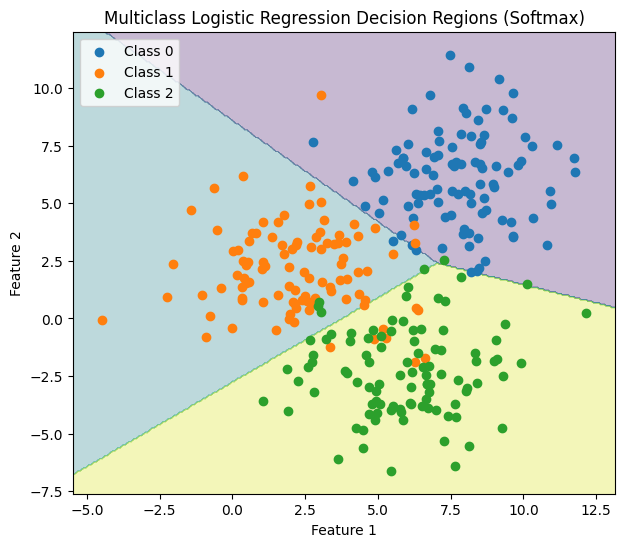

In [74]:
# =============================================================
# Step 4.2 Decision Boundary Visualization (Training set)
# =============================================================

# -----------------------------
# 1: Create grid
# -----------------------------

x1_min, x1_max = X["Feature 1"].min() - 1, X["Feature 1"].max() + 1
x2_min, x2_max = X["Feature 2"].min() - 1, X["Feature 2"].max() + 1

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 300),
    np.linspace(x2_min, x2_max, 300)
)

grid = np.c_[xx1.ravel(), xx2.ravel()]

# -----------------------------
# 2: Predict class on grid
# -----------------------------

grid = pd.DataFrame(
    np.c_[xx1.ravel(), xx2.ravel()],
    columns = ["Feature 1", "Feature 2"]
)

grid_pred = model_softmax.predict(grid)
grid_pred = grid_pred.reshape(xx1.shape)

# -----------------------------
# 3: Plot decision regions and data
# -----------------------------

plt.figure(figsize = (7, 6))

plt.contourf(xx1, xx2, grid_pred, alpha = 0.3)

for class_label in sorted(df_multi["Class"].unique()):
    class_data = df_multi[df_multi["Class"] == class_label]
    plt.scatter(
        class_data["Feature 1"],
        class_data["Feature 2"],
        label = f"Class {class_label}"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Multiclass Logistic Regression Decision Regions (Softmax)")
plt.legend()
plt.show()

In [75]:
# -----------------------------
# Step 5: Side-by-side comparison (OvR and Softmax)
# -----------------------------

comparison_df = pd.DataFrame({
    "Model": ["One-vs-Rest", "Softmax (Multinomial)"],
    "Test Accuracy": [acc_ovr, acc_softmax]
})

comparison_df

,Model,Test Accuracy
0,One-vs-Rest,0.9
1,Softmax (Multinomial),0.9


In [76]:
# -----------------------------
# Step 6: Compare predicted probabilities
# -----------------------------

proba_ovr = model_ovr.predict_proba(X_test)
proba_softmax = model_softmax.predict_proba(X_test)

print("OvR probabilities (first 5 samples):")
print(np.round(proba_ovr[:5], 3))

print("\nSoftmax probabilities (first 5 samples):")
print(np.round(proba_softmax[:5], 3))

# OvR probabilities are less “balanced”
# Softmax probabilities sum to 1 by construction

OvR probabilities (first 5 samples):
[[0.72  0.    0.28 ]
 [0.001 0.995 0.003]
 [0.    0.997 0.003]
 [0.    0.979 0.021]
 [0.    0.612 0.388]]

Softmax probabilities (first 5 samples):
[[1.    0.    0.   ]
 [0.    0.995 0.004]
 [0.    0.999 0.001]
 [0.    0.99  0.01 ]
 [0.    0.708 0.291]]


In [77]:
# -----------------------------
# Step 7: Confusion matrices (To be taught later)
# -----------------------------

from sklearn.metrics import accuracy_score, confusion_matrix

print("Confusion Matrix - OvR")
print(confusion_matrix(y_test, y_pred_ovr))

print("\nConfusion Matrix - Softmax")
print(confusion_matrix(y_test, y_pred_softmax))

Confusion Matrix - OvR
[[17  0  0]
 [ 2 20  4]
 [ 0  0 17]]

Confusion Matrix - Softmax
[[16  1  0]
 [ 2 21  3]
 [ 0  0 17]]


##### =============================================================
#### Notes for Students:
#### Key observations
####    1) Accuracy may be similar.
####    2) Decision logic is different.
####    3) Softmax is one unified model.
####    4) OvR trains multiple independent classifiers.
####    5) Softmax often behaves better when classes overlap.
#### *** Both OvR and Softmax can solve multiclass problems, but Softmax learns all classes together, while OvR trains separate binary classifiers.
##### =============================================================

#### =============================================================
#### Part 3: Regularized Logistic Regression
#### Dataset: Microchips_Data.csv
#### =============================================================

In this part, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

Ref: Machine Learning by Andrew Ng: www.coursera.org/

In [78]:
# -----------------------------
# Step 1: Load data
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Lecture Note/Year 4/Semester 2/INTRO MAC LANG IE/Python Code/02_Logistic Regression/Data/Microchips_Data.csv")

df.head()

,Microchip Test 1,Microchip Test 2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


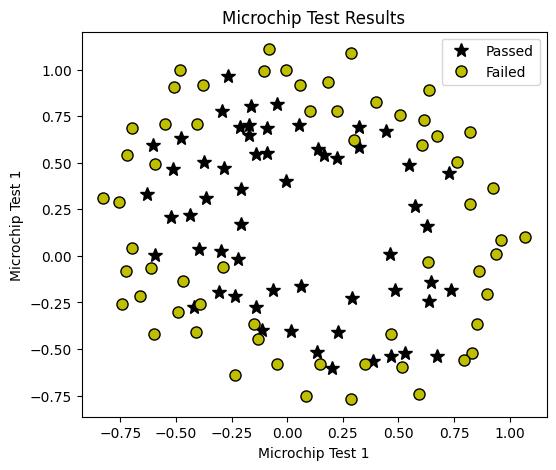

In [79]:
# -----------------------------
# Step 2: Visualize data
# -----------------------------

passed = df[df["Result"] == 1]
failed = df[df["Result"] == 0]

plt.figure(figsize = (6, 5))

# Positive examples (Passed)
plt.plot(
    passed["Microchip Test 1"],
    passed["Microchip Test 2"],
    'k*',
    lw = 2,
    ms = 10,
    label = "Passed"
)

# Negative examples (Failed)
plt.plot(
    failed["Microchip Test 1"],
    failed["Microchip Test 2"],
    'ko',
    mfc = 'y',
    ms = 8,
    mec = 'k',
    mew = 1,
    label = "Failed"
)

plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 1")
plt.title("Microchip Test Results")
plt.legend()
plt.grid(False)
plt.show()

In [80]:
# -----------------------------
# Step 3: Define X and y
# -----------------------------

X = df[["Microchip Test 1", "Microchip Test 2"]]
y = df["Result"]

In [81]:
# -----------------------------
# Step 4: Polynomial feature mapping (degree = 6)
# -----------------------------

poly = PolynomialFeatures(
    degree = 6,
    include_bias = True
)

X_poly = poly.fit_transform(X)

print("Number of features (including bias):", X_poly.shape[1])

Number of features (including bias): 28


In [82]:
# -----------------------------
# Step 5: Define models with different regularization strengths
# -----------------------------

models = {
    "Overfitting (λ = 0)": LogisticRegression(
        penalty = None,  # λ = 0 equivalent to no regularization
        solver = "lbfgs",
        max_iter = 10000
    ),
    "Balanced (λ = 1)": LogisticRegression(
        C = 1.0,         # c = 1/λ = 1/1 = 1
        penalty = "l2",
        solver = "lbfgs",
        max_iter = 10000
    ),
    "Underfitting (λ = 100)": LogisticRegression(
        C = 0.01,        # c = 1/λ = 1/100 = 0.01
        penalty = "l2",
        solver = "lbfgs",
        max_iter = 10000
    )
}

# penalty = "l2" = ridge regularization
# penalty = "l2" applies L2 regularization, which penalizes
# large coefficients and helps prevent overfitting

In [83]:
# -----------------------------
# Step 6: Create grid
# -----------------------------

x1_min, x1_max = X["Microchip Test 1"].min() - 0.2, X["Microchip Test 1"].max() + 0.2
x2_min, x2_max = X["Microchip Test 2"].min() - 0.2, X["Microchip Test 2"].max() + 0.2

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 300),
    np.linspace(x2_min, x2_max, 300)
)

grid = pd.DataFrame(
    np.c_[xx1.ravel(), xx2.ravel()],
    columns = ["Microchip Test 1", "Microchip Test 2"]
)

grid_poly = poly.transform(grid)

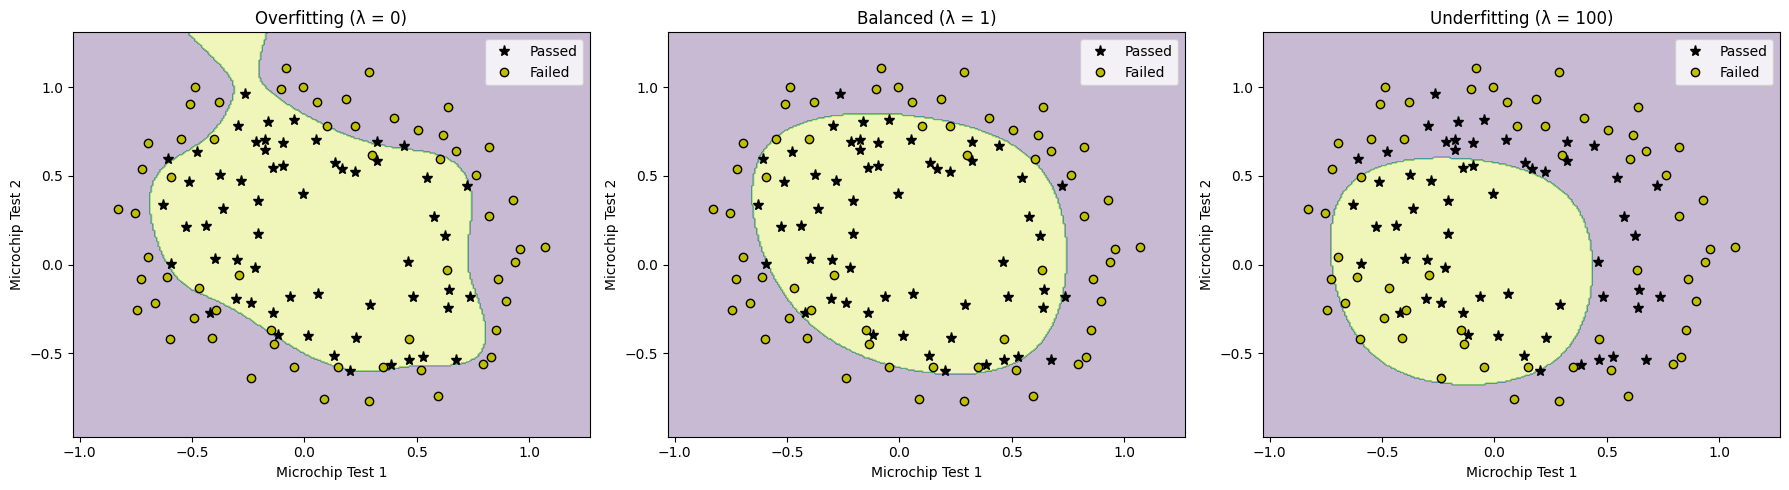

In [84]:
# -----------------------------
# Step 7: Plot decision boundaries for different λ
# -----------------------------

plt.figure(figsize = (18, 5))

for i, (title, model) in enumerate(models.items(), 1):

    # Train model
    model.fit(X_poly, y)

    # Predict on grid
    grid_pred = model.predict(grid_poly)
    grid_pred = grid_pred.reshape(xx1.shape)

    # Plot decision region
    plt.subplot(1, 3, i)
    plt.contourf(xx1, xx2, grid_pred, alpha = 0.3)

    # Plot training data
    plt.plot(
        passed["Microchip Test 1"],
        passed["Microchip Test 2"],
        'k*',
        lw = 2,
        ms = 8,
        label = "Passed"
    )

    plt.plot(
        failed["Microchip Test 1"],
        failed["Microchip Test 2"],
        'ko',
        mfc = 'y',
        ms = 6,
        mec = 'k',
        mew = 1,
        label = "Failed"
    )

    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.title(title)
    plt.legend()
    plt.grid(False)

plt.tight_layout()
plt.show()

In [85]:
# =============================================================
# Step 8: Training Accuracy for Different Regularization Levels
# =============================================================

for title, model in models.items():

    # Train model on full dataset
    model.fit(X_poly, y)

    # Predict on training data and testing data
    y_train_pred = model.predict(X_poly)

    # Compute training accuracy
    train_acc = accuracy_score(y, y_train_pred)

    print(f"{title} -> Training Accuracy: {train_acc:.4f}")

Overfitting (λ = 0) -> Training Accuracy: 0.8729
Balanced (λ = 1) -> Training Accuracy: 0.8305
Underfitting (λ = 100) -> Training Accuracy: 0.6102
